<a href="https://colab.research.google.com/github/simon-m-mudd/physical_geography_practicals/blob/main/physical_geography_climate_practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Physical Geography Climate Practical

*Last edit Simon Mudd 08/02/2024*

This practical has been developed over many years by Chris Merchant, Simon Mudd, Simon Tett and Ruth Doherty, initial python conversion by Simon Mudd.  

## Overview

In this practical you will apply some concepts introduced in your climate lectures in order to make some simple calculations about the Earth’s climate.
The learning outcomes are to:
1.	Have an understanding of very simple models of temperature at the Earth’s surface.
2.	Have an understanding of how the Earth’s temperature might change due to changes in solar irradiation and land use (as idealized as changes to albedo).
3.	Have an understanding of how long it takes the climate to change in response to changes in the above two factors.
And to be able to;
4.	Use a spreadsheet to examine simple mathematical models.
5.	Use a spreadsheet to make plots illustrating the behaviour of simple mathematical and numerical models.


## Introduction

Today you will be using python to examine what could be described as the world’s simplest climate model. This model uses some very basic equations to predict how the climate responds to changes in solar activity and land cover (via albedo). First we’ll go over the climate model (i.e., the science behind the model) and then you’ll get a chance to use a spreadsheet to explore the model.

### Energy emitted from an object proprtional to temperature

In the late 1800s, two Austrian physicists figured out that heat energy emitted (radiated) from an object is proportional to the fourth power of its surface temperature. These two physicists were Josef Stefan, who came upon this result through experiments in 1879, and Ludwig Boltzman, who derived the relationship from thermodynamics in 1884. The result of their work is something called the Stefan-Boltzman Law, which is the basis for today’s practical. This is the Stefan-Boltzman law:

$F = \sigma T^4$  									(1)

where *F* is an energy flux, σ (the Greek letter sigma) is a constant called (unsurprisingly) the Stefan-Boltzman constant, and *T* is the temperature of the body (at its surface). *F* represents the rate at which an object loses heat from a unit area of its surface by radiating light or other wavelengths of radiation, and is usually in the units of Watts/m$^2$.

### Solving for temperature if you know the heat flux

In the case of Earth, the wavelengths of Earth’s cooling to space are infrared  so we’ll label this flux $F_{IR}$. For this equation to work, $T$ must be expressed in the units of kelvin (which is degrees Celsius + 273), and the Stefan-Boltzman constant is 5.67 x 10$^{-8}$ $W/m^2/K^4$. Suppose you knew the energy flux and wanted to know the resulting temperature of some object (for example, the Earth). You just do a little bit of algebra and get:

$ T = \left(  \frac{F_{IR}}{\sigma} \right)^{1/4}$									(2)

Since Earth is continually losing energy to Space by this mechanism, there must be a balancing inflow of energy to supply the heat (or else Earth’s surface would rapidly cool down). This is supplied by the solar energy arriving at Earth, allowing for the albedo of Earth’s atmosphere and surface (controlling how much of this energy is reflected from it):

$ F_{sol} =  \frac{S(1-a)}{4} $	 ,									(3)

where *S* is the solar constant (how much energy reaches the top of Earth’s atmosphere from the sun, per unit of area) and is equal to 1370 Watts/m$^2$, and a is the albedo (which is a dimensionless fraction). The average albedo of the Earth is ~0.3. The principle that the solar input heating Earth is in balance with the infrared energy radiated to space is an example of the important concept of “dynamic equilibrium’: that the state of a system is controlled by a balance between input and output flows (of energy, in this case). So, to the degree that Earth’s temperature is stable (which it approximately is) $F_{IR} = F_{sol}$. Therefore, sticking equation (3) and equation (2) together you can calculate the global average temperature of the Earth.

### The slightly more complicated case of heat being emitted from the atmosphere

It is not quite simple to interpret this temperature, however, because on Earth both the solid surface and the atmosphere emit heat, so equation (2) actually gives you the temperature at an average height from which heat is radiated to Space. This height is complicated to find (it depends on vertical distributions of temperature, clouds and gases in the atmosphere) and turns out to be 5.5 km. The temperature at the solid surface upon which we live can be determined by

$T_{surf} = T+LH$,								(4)

where $L$ is something called the atmospheric lapse rate (how temperature changes with height in the atmosphere: it is 6 K/km) and $H$ is the average height from which radiation to space originates (that is, 5.5 km). So sticking all these equations together you get a very simple climate model:

$T_{surf} = \left(  \frac{S(1-a)}{4 \sigma} \right)^{1/4}+LH$.							(5)

## Practical part 1

If you did the first practical, you will know about code "cells" in this notebook.

If you don't, here is the summary. This notebook is divided into cells (if you click on anyhing here a little box will form around it, that is a cell).

Some of the cells are text cells. They don't do anything.

Some of the cells are python code.

**In Noteable** python cells have **In []:** written next to them.

**In Google colab** python cells have a symbol that looks like a "play" button if you hover over them.

In both of these environments, if you click on the cell and then type `shift+enter` the cell will run.

The next cell is some code. It is a function that calculates equation (5) above. **Do not change anything in this cell**. But you will need to run it before you can start making temperature calcluations.

In [1]:
import numpy as np

def calculate_surface_temperature(S,albedo,lapse_rate = 6,height = 5.5,StefanBolz=0.0000000567):
  """
  a function for calculating the surface tempurature in degrees Kelvin

  args:
    S (flt): Solar irradiation in W/m^2
    albedo (flt): the albedo
    lapse_rate (flt): the lapse rate in K/km. default set to 6.
    height (flt): height from which radiation to space originates (km). Default is 5.5
    StefanBolz (flt): StefanBoltzman coefficient in W/m^2/K^4

  return:
    the surface temperature in kelvin
  """

  power_term = np.divide(np.multiply(S, np.subtract(1,albedo)),4*StefanBolz)
  power_term = np.power(power_term,0.25)
  surf_temp = np.add(power_term, lapse_rate*height)

  return surf_temp


Okay, now that you have the function, lets see if it works. We input the solar energy flux as well as the albedo to get the temperature in kelvin:

In [2]:
surf_temp_K = calculate_surface_temperature(1365,0.28)
surf_temp_C = surf_temp_K-273
print("The surface temperature is "+str(surf_temp_C)+ " degrees celsius")

The surface temperature is 16.569793351513454 degrees celsius


Okay, now we can start exploring some behaviour of this simplified climate system.

The first thing we want to know is how sensitive the climate system is to changes in solar irradiation.

Direct measurements of solar irradiation have only been undertaken since ~1975. The data can be found here: http://www.acrim.com/

To go further back than the satellite data others use what are called ‘proxy’ records of solar variability. One such proxy is an isotope called $^{10}$Be, it is produced in the atmosphere by cosmic rays and you can measure it in ice cores where, using various techniques like looking at annual bands, one can reconstruct which parts of the cores are from what date. One such proxy record is reported here:

*Crowley, TJ (2000), Causes of climate change over the past 1000 years, Science, 289, 270-277.*

The punch line is that solar irradiance has varied by ~0.1-0.3% over the last 1000 years.

### Make a set of irradiation values and run them to see the effect on temperature

I'm going to test some values that have a central value of 1365  W/m^2 (about today's value) and vary it by a conservative 0.4%.

I am going to want these in an array of numbers, which is the standard way python looks at quantitative data.

I know how to write this code since I have been doing this for a number of years, but you don't need all that experience, I just wrote the below prompt into Bing chat:

Bing prompt: **I want to make a numpy array with 21 values that vary by 0.3% with 1365 as the middle value.**

In [3]:
# Define the middle value and the percentage variation
middle_value = 1365
percentage_variation = 0.004

# Calculate the start and end values
start_value = middle_value * (1 - percentage_variation)
end_value = middle_value * (1 + percentage_variation)

# Create the numpy array
S_values = np.linspace(start_value, end_value, 21)

print(S_values)

[1359.54  1360.086 1360.632 1361.178 1361.724 1362.27  1362.816 1363.362
 1363.908 1364.454 1365.    1365.546 1366.092 1366.638 1367.184 1367.73
 1368.276 1368.822 1369.368 1369.914 1370.46 ]


Okay, now lets plug this in to the function and see what happens:

In [4]:
surf_temp_K = calculate_surface_temperature(S_values,0.30)
print("Temperatures in Kelvin:")
print(surf_temp_K)
print("And in degrees C:")
print(surf_temp_K-273)

Temperatures in Kelvin:
[287.5140401  287.53958987 287.56513195 287.59066634 287.61619305
 287.64171209 287.66722346 287.69272716 287.71822321 287.7437116
 287.76919234 287.79466544 287.8201309  287.84558873 287.87103893
 287.89648151 287.92191647 287.94734382 287.97276357 287.99817571
 288.02358027]
And in degrees C:
[14.5140401  14.53958987 14.56513195 14.59066634 14.61619305 14.64171209
 14.66722346 14.69272716 14.71822321 14.7437116  14.76919234 14.79466544
 14.8201309  14.84558873 14.87103893 14.89648151 14.92191647 14.94734382
 14.97276357 14.99817571 15.02358027]


In [5]:
import pandas as pd

# Create a dictionary where keys are column names and values are numpy arrays
data = {"temp_K": surf_temp_K, "S": S_values}

# Create the pandas DataFrame
df = pd.DataFrame(data)

print(df)

        temp_K         S
0   287.514040  1359.540
1   287.539590  1360.086
2   287.565132  1360.632
3   287.590666  1361.178
4   287.616193  1361.724
5   287.641712  1362.270
6   287.667223  1362.816
7   287.692727  1363.362
8   287.718223  1363.908
9   287.743712  1364.454
10  287.769192  1365.000
11  287.794665  1365.546
12  287.820131  1366.092
13  287.845589  1366.638
14  287.871039  1367.184
15  287.896482  1367.730
16  287.921916  1368.276
17  287.947344  1368.822
18  287.972764  1369.368
19  287.998176  1369.914
20  288.023580  1370.460


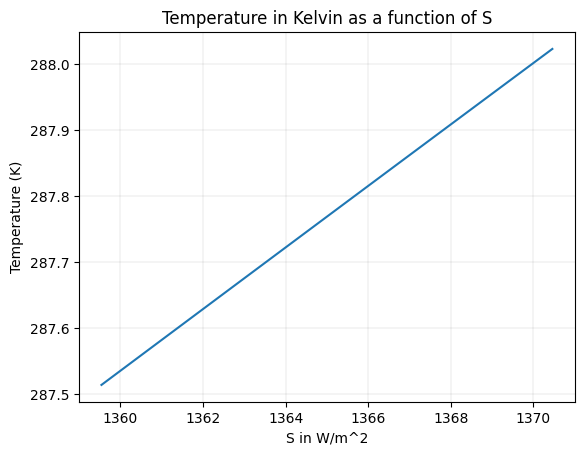

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.lineplot(data=df, x="S", y="temp_K")

plt.title('Temperature in Kelvin as a function of S')
plt.xlabel('S in W/m^2')
plt.ylabel('Temperature (K)')

# Add grey boxes in the background
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

Here is a bit of a test to see if you can use the above two blocks of code to make a plot of the temperature in degrees C as a function of S

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine the three previous code blocks to make the same plot but in degrees Celsius rather than Kelvin.
# Feel free to use the chat in Microsoft copilot for this.


### Temperature as a function of albedo

Below is a code block that we used to vary the the solar irradiation.

* You will need to change the middle value.
* You will need to change the percentage variation. For reference, a completely ice free, cloudless Earth would have an albedo of~0.25, and a completely ice covered Earth would have an albedo of ~0.6
* I have renamed the variable Albedo_values



In [13]:
# Define the middle value and the percentage variation
middle_value = 1365
percentage_variation = 0.004

# Calculate the start and end values
start_value = middle_value * (1 - percentage_variation)
end_value = middle_value * (1 + percentage_variation)

# Create the numpy array
Albedo_values = np.linspace(start_value, end_value, 21)

print(Albedo_values)

[0.24  0.246 0.252 0.258 0.264 0.27  0.276 0.282 0.288 0.294 0.3   0.306
 0.312 0.318 0.324 0.33  0.336 0.342 0.348 0.354 0.36 ]


Now you will need to make a few modifications to get the data ready for plotting.

* We will use a constant value of the solar irradiation of 1361 W/m^2. Make sure you change this number below.
* You need to calculate the temperature in Kelvin. The get it in degrees Celsius. You need tochange the code convert to kelvin (which is degree celcius + 273)

In [15]:
## First make the S value a single number
S_value = 1500  ## You need to change this!!!

## Now make calculate surface temperature
surf_temp_K = calculate_surface_temperature(S_value,Albedo_values)

## Now make the temperature in Celsius
# You need to change the number in the next line!!
surf_temp_C = surf_temp_K-10
print(surf_temp_C)

import pandas as pd

# Create a dictionary where keys are column names and values are numpy arrays
data = {"temp_C": surf_temp_C, "Albedo": Albedo_values}

# Create the pandas DataFrame
df = pd.DataFrame(data)

print(df)

[299.26583824 298.73875053 298.20850762 297.67506507 297.13837749
 296.59839843 296.05508039 295.50837481 294.95823199 294.40460107
 293.84743001 293.28666554 292.72225312 292.15413688 291.58225961
 291.00656269 290.42698607 289.84346819 289.25594592 288.66435457
 288.06862775]
[26.26583824 25.73875053 25.20850762 24.67506507 24.13837749 23.59839843
 23.05508039 22.50837481 21.95823199 21.40460107 20.84743001 20.28666554
 19.72225312 19.15413688 18.58225961 18.00656269 17.42698607 16.84346819
 16.25594592 15.66435457 15.06862775]


### Make a plot of the results!

You will need to change the `x` and `y` parameters below, and change the labels as well.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.lineplot(data=df, x="S", y="temp_K")

plt.title('Temperature in Kelvin as a function of S')
plt.xlabel('S in W/m^2')
plt.ylabel('Temperature (K)')

# Add grey boxes in the background
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

The probable changes in albedo over the past millennia are much smaller thangoing from a dark earth to a frozen earth. For comparison’s sake, you shouldvary the albedo by ±0.4% (about the current mean of 0.3) and make a plot withlabels and captions. How much does the equilibrium temperature change by?Are temperature changes here linear?

Share your plots with others in your practical group and get feedback on them– and give critical feedback to others. When giving feedback you might wantto think about the following: Are all axis and the plot labelled? Does the plothave units? Does the caption explain the elements of the plot? Is it pretty?

## Practical Part 2: Climate response time

Now that you have some idea about how sensitive the climate is to changes in albedoand solar activity, we will investigate how long it takes climate (or the climate’s temperature) to change if either albedo or solar activity changes.

The climate cannot react instantaneously: it takes time to heat different parts of the earth surface system.

Equation (5) describes an equilibrium model: it assumes the amount of energy entering the Earth surface system is the same as the energy radiating from the Earth surface system. It cannot tell you how fast the Earth will warm or cool if its energy balance changes.

For example, if albedo decreases then the Earth will absorb more solar energy. It heats up until it radiates the same amount of heat as it absorbs (remember that according to the Stefan-Boltzman law the warmer an object is the more heat it radiates).

It turns out that the rate at which the surface temperature changes is a function of all of the same things as the equilibrium temperature (S, a, L, H, and $\sigma$), as well as somemeasures of how much energy it takes to heat up the near surface. The oceans are themain component of Earth’s surface system that needs to absorb energy before thesurface temperature increases. The change in surface temperature ($\Delta T_{surf}$) over somechange in time ($\Delta$t) is equal to:

$\frac{\Delta T_{surf}}{\Delta t} = \frac{1}{MC} \left(  \frac{S(1-a)}{4} - \sigma(T_{surf}-LH)^4\right)$.	(6)

In mathematics, the symbol $\Delta$ (which is the upper case Greek letter delta) indicates change.

Strictly speaking, the left side of equation (6) is really  $\partial$ $T_{surf}$ /  $\partial t$, which also indicates the change in surface temperature for a change in time, but the curly symbol indicates an infinitesimal change.

Programming languages can’t compute infinitesimal change,however, so we will use equation (7). The change in surface temperature over sometime period t is just the temperature at some time t+t minus the temperature attime t. We can write this as

$\frac{T_{surf}^{new}-T_{surf}^{old}}{\Delta t} = \frac{1}{MC} \left(  \frac{S(1-a)}{4} - \sigma(T_{surf}^{old}-LH)^4\right)$.	(7)

where the old and new superscripts just indicate the old and new temperatures. A little algebra gives:

$T_{surf}^{new} = \frac{\Delta t}{MC} \left(  \frac{S(1-a)}{4} - \sigma(T_{surf}^{old}-LH)^4\right)$ + $T_{surf}^{old}$.	(8)

The term M is the average mass of water per square metre we heat in order to warm the planet. If we assume that all the Earth's thermal inertia is the upper ocean mixed layer, say, 100 m depth, then M = 0.7 * 100 m * 1000 kg /m3 = 70,000 kg / m2 where the 0.7 is just the fraction of the Earth’s surface covered by water and 1000 kg / m3 is the density of water.

The term C is the heat capacity of water: ~4000 J/kg/K. In this practical we will use the units of years for $\Delta t$. This unit of time is not the same as used in the other parameters (S for example) so you have to multiply $\Delta t$ by a conversionfactor 3600*24*365 to get the correct temperature.

Note: the SI unit Watts (W) is = J/s

### That fancy equation as code

Below is equation (8) written in python code.

In [ ]:
import numpy as np

def update_trasient_surface_temperature(T_surf_old,Delta_t=1,M=70000,C=4000,albedo=0.31,lapse_rate = 6,height = 5.5,StefanBolz=0.0000000567,S=1361):
  """
  a function for calculating the surface tempurature in degrees Kelvin

  args:
    Delta_t (flt): timtestep in years
    M (flt): average mass of water per squre metre we need to heat in kg/m^2
    C (flt): heat capacity of water in J/kg/K
    S (flt): Solar irradiation in W/m^2
    albedo (flt): the albedo
    lapse_rate (flt): the lapse rate in K/km. default set to 6.
    height (flt): height from which radiation to space originates (km). Default is 5.5
    StefanBolz (flt): StefanBoltzman coefficient in W/m^2/K^4

  return:
    the surface temperature in kelvin after a timestep
  """

  first_term = Delta_t/(M*C)
  second_term = S*(1-a)/4
  power_term = T_surf+old-L*H
  third_term = sigma*np.power(power_term,4)
  surf_temp = first_term*(second_term-third_term)+T_surf_old

  return surf_temp